In [1]:
#Standard libraries for data analysis:
import numpy as np
import pandas as pd

#Standard libraries for data visualization:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 8
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px
import plotly.tools as tls

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

**Loading the Data**

---



In [2]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [118]:
ibm = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv', encoding='Latin-1')
display(ibm.head(), ibm.tail())

,ï»¿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


,ï»¿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [75]:
#display(ibm.isnull().any())
display(ibm[ibm.duplicated(keep='first')].shape)  # checing for duplicate rows
ibm.rename(columns={'ï»¿Age': 'Age'}, inplace=True) #renaming age column

(0, 35)

Note: dataset has no duplicate rows

# Exploratory Data Analysis

Here we take a look at the data and see how features are contributing to the data and to attrition of employees.

In [11]:
display(ibm.info())
# display(ibm.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

None

Visualizing the distribution of the target Variable

In [12]:
fig = px.pie(ibm, names = "Attrition", title = "Attrition Value Counts")
fig.show(renderer='colab')

- From the charts above we realize that the dataset is imbalanced and it is necessary to apply either undersampling or oversampling to it in later stages when modelling

**Correlation:**

---


In [76]:
# eliminating columns with only one data level
temp = []
for col in ibm.columns:
    if len(ibm[col].unique()) == 1:
        temp.append(col)
        ibm.drop(col, inplace=True, axis=1)

display(temp)

['EmployeeCount', 'Over18', 'StandardHours']

In [77]:
# dropping other unnecessary columns
ibm.drop(columns='EmployeeNumber', inplace=True)

In [79]:
map = {'Yes':1, 'No':0}
ibm['Attrition_encoded'] = ibm['Attrition'].apply(lambda x: map[x])
ibm['Overtime_encoded'] = ibm['OverTime'].apply(lambda x: map[x])

In [80]:
numericals = ibm.select_dtypes(include=np.number).columns.tolist()
display(ibm[numericals].corr())

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_encoded,Overtime_encoded
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205,0.028062
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652,0.009135
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924,0.025514
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373,-0.020322
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369,0.070132
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846,-0.007782
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016,-0.003507
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105,0.000544
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.103481,0.024539
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.159840,0.006089


In [81]:
data = [go.Heatmap( z = ibm[numericals].astype('float64').corr().values,   #generates pearson correlation values
                    x = ibm[numericals].columns.values, y = ibm[numericals].columns.values,
                    colorscale = 'Reds', reversescale = False, opacity = 1.0 ) ]

layout = go.Layout( title = 'Comparing Pearson Correlation Values of the Numerical Columns',
                    xaxis = dict(ticks='', nticks=36), yaxis = dict(ticks='' ),
                    width = 900, height = 700, )

fig = go.Figure(data=data, layout=layout)
fig.show(renderer='colab')

From the above correlation table and matrix we can conclude that: 
1. Monthly income is highly correlated with job level. However, daily rate, hourly rate and monthly rate are barely correlated with anything. 
2. Job level and total working years are highly correlated.
3. Monthly Income and total working years are highly correlated.
4. Performance rating and percentage salary hike are highly correlated.
5. Years in current role and years at company are highly correlated.
6. Years with current manager and years at company are highly correlated.

In [82]:
# dropping the daily, montly and hourly rates
ibm.drop(columns=['DailyRate', 'HourlyRate', 'MonthlyRate'], inplace=True)

In [ ]:
# plotting frequency distribution of each attribute
#ibm.hist(bins = 30, figsize = (20,20), color = 'r')

In [116]:
def countplot_ratio(x,data,hue=None,ax=None):
    ax=sns.countplot(x,data=data,hue=hue,ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=10)
    ax.set_title(x + " Distributions")
    #ax.legend(bbox_to_anchor=(1.01,1))
    total = float(len(data))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3, '{:.2f}%'.format((height/total)*100),fontsize=12, weight = 'bold',ha="center") 

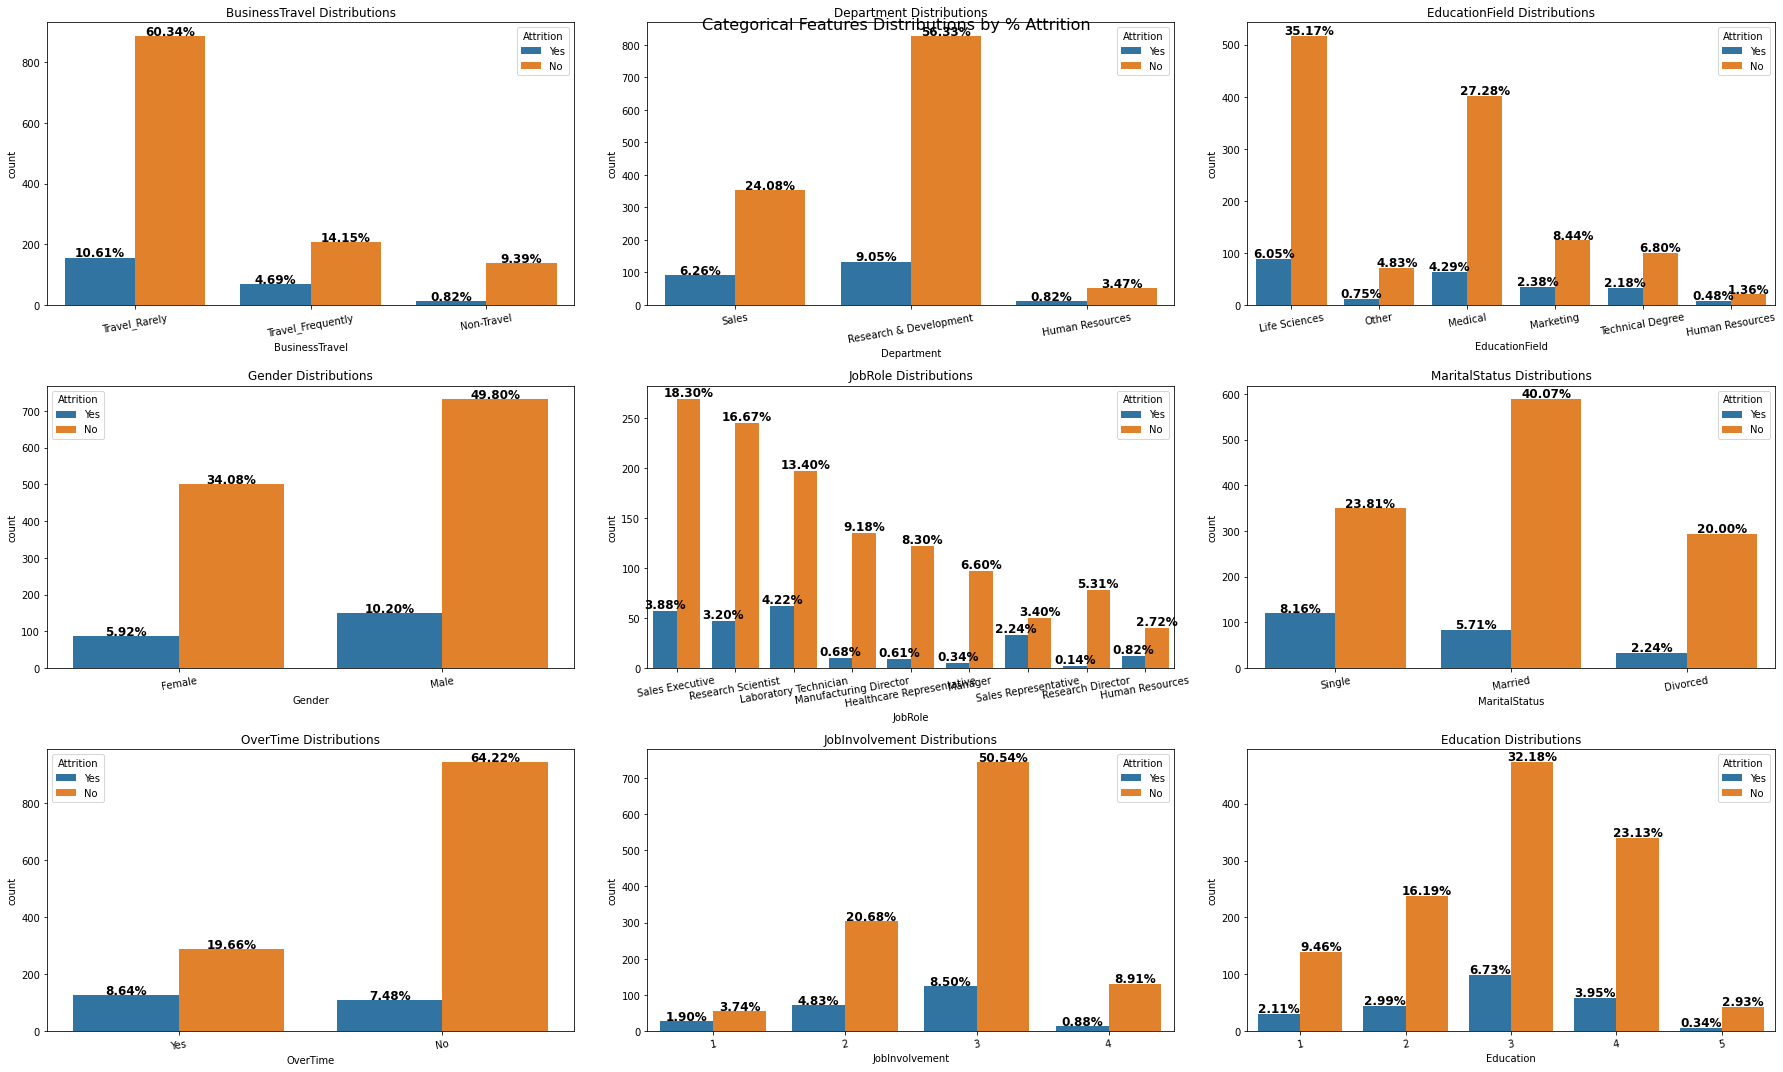

In [120]:
features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 
            'JobInvolvement', 'Education']

fig, axes =plt.subplots(3, 3, figsize=(25, 15),)
axes = axes.flatten()
fig.suptitle('Categorical Features Distributions by % Attrition',fontsize=16)


for ax, col in zip(axes, features):
    countplot_ratio(col, ibm[features], hue=ibm["Attrition"], ax=ax)

plt.tight_layout()  
plt.show()

Note: We conclude that:
1. Single employees tend to leave compared to married and divorced
2. Sales Representitives tend to leave compared to any other job 
3. Less involved employees tend to leave the company 
4. Less experienced (low job level) tend to leave the company

**Visualising Distance From Home with respect to Attrition**

---



Text(0.5, 0, 'Distance From Home')

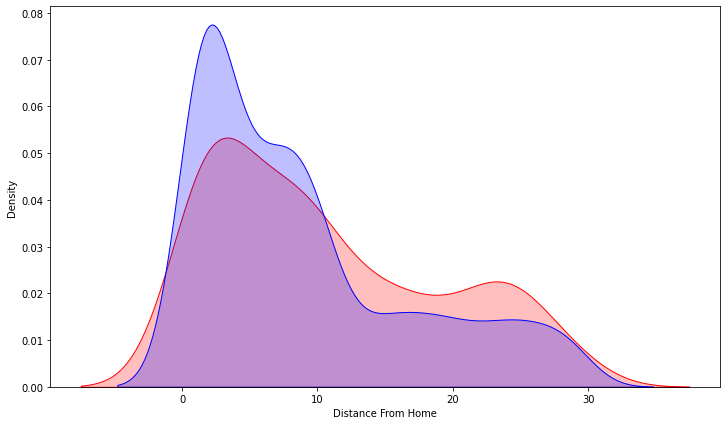

In [ ]:
# KDE (Kernel Density Estimate) describes the Probability Density of a continuous variable. 

plt.figure(figsize=(12,7))
sns.kdeplot(ibm['DistanceFromHome'][ibm.Attrition == 'Yes'], label= 'Employees who Left', shade = True, color = 'r')
sns.kdeplot(ibm['DistanceFromHome'][ibm.Attrition == 'No'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Distance From Home')

# Question 1. Break down of DistanceFromHome by JobRole and Attrition

---




In [68]:
display(pd.crosstab(ibm.DistanceFromHome, [ibm.JobRole, ibm.Attrition], margins=True))

JobRole          Healthcare Representative     Human Resources      \
Attrition                               No Yes              No Yes   
DistanceFromHome                                                     
1                                       23   0               8   1   
2                                       14   1               9   1   
3                                        4   0               3   0   
4                                        3   0               2   0   
5                                        6   0               1   0   
6                                        4   0               2   1   
7                                        8   0               0   0   
8                                        8   0               5   1   
9                                        5   0               1   1   
10                                       7   0               2   0   
11                                       4   1               1   0   
12                                       3   0               0   0   
13                                       2   0               1   1   
14                                       1   1               0   0   
15                                       2   1               0   0   
16                                       4   0               0   0   
17                                       1   0               1   1   
18                                       4   0               0   1   
19                                       0   0               1   0   
20                                       4   1               0   1   
21                                       1   1               0   0   
22                                       0   0               0   2   
23                                       2   1               0   1   
24                                       3   1               1   0   
25                                       4   0               1   0   
26                                       1   0               1   0   
27                                       2   0               0   0   
28                                       1   0               0   0   
29                                       1   1               0   0   
All                                    122   9              40  12   

JobRole          Laboratory Technician     Manager     Manufacturing Director  \
Attrition                           No Yes      No Yes                     No   
DistanceFromHome                                                                
1                                   27   4      13   0                     23   
2                                   25  11      22   3                     22   
3                                   12   3       6   0                      4   
4                                    9   3       8   0                      6   
5                                    7   2       6   0                      4   
6                                   12   3       3   0                      5   
7                                   10   6       5   0                     10   
8                                   10   4       3   0                      5   
9                                   18   4       4   0                      5   
10                                   6   3       5   0                      6   
11                                   5   0       3   0                      3   
12                                   3   1       0   0                      3   
13                                   2   0       1   0                      1   
14                                   1   2       0   0                      0   
15                                   3   2       0   1                      1   
16                                   5   2       1   0                      3   
17                                   3   2       2   0                      2   
18                                   3   0       1   0               

In [61]:
display(ibm.groupby(['JobRole','Attrition']).DistanceFromHome.mean().unstack())

Attrition,No,Yes
JobRole,,
Healthcare Representative,9.204918,17.666667
Human Resources,6.600000,13.416667
Laboratory Technician,9.329949,9.661290
Manager,7.927835,10.000000
Manufacturing Director,9.533333,8.800000
Research Director,8.474359,7.000000
Research Scientist,8.869388,9.765957
Sales Executive,9.026022,12.649123
Sales Representative,9.000000,8.151515


Text(0, 0.5, 'Distance from Home')

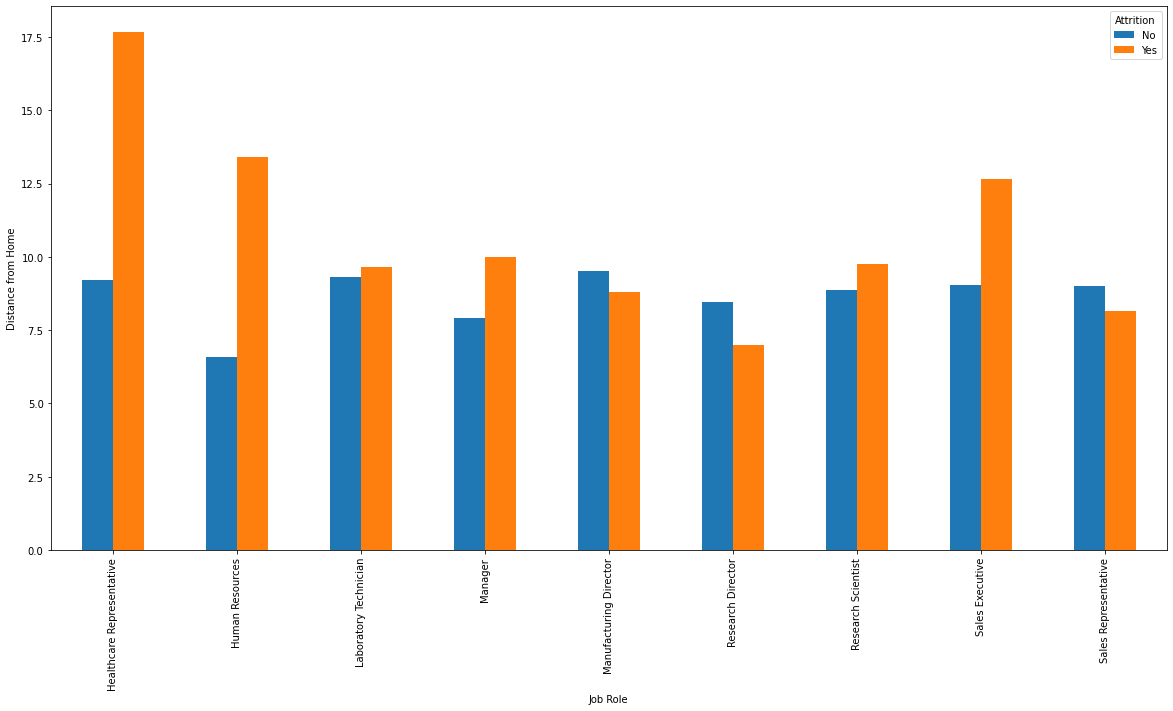

In [60]:
plt.rcParams['figure.figsize'] = 20, 10
ibm.groupby(['JobRole','Attrition']).DistanceFromHome.mean().unstack().plot(kind='bar')
plt.xlabel('Job Role')
plt.ylabel('Distance from Home')

- Among the employees in various job roles, the mean distance of work from home for HealthCare Representatives, Human Resources Employees, Managers, and Sales Executives employees who left the company is larger than the mean distance of work from home for the employees who did not leave

# Question 2. Comparing the Average Monthly Income by Education and Attrition

---



In [69]:
display(ibm.groupby(['Education','Attrition']).MonthlyIncome.mean().unstack())

Attrition,No,Yes
Education,,
1,5926.129496,4360.161290
2,6586.058824,4282.545455
3,6882.919662,4770.242424
4,7087.814706,5335.155172
5,8559.906977,5850.200000


Text(0, 0.5, 'Average Monthly Income')

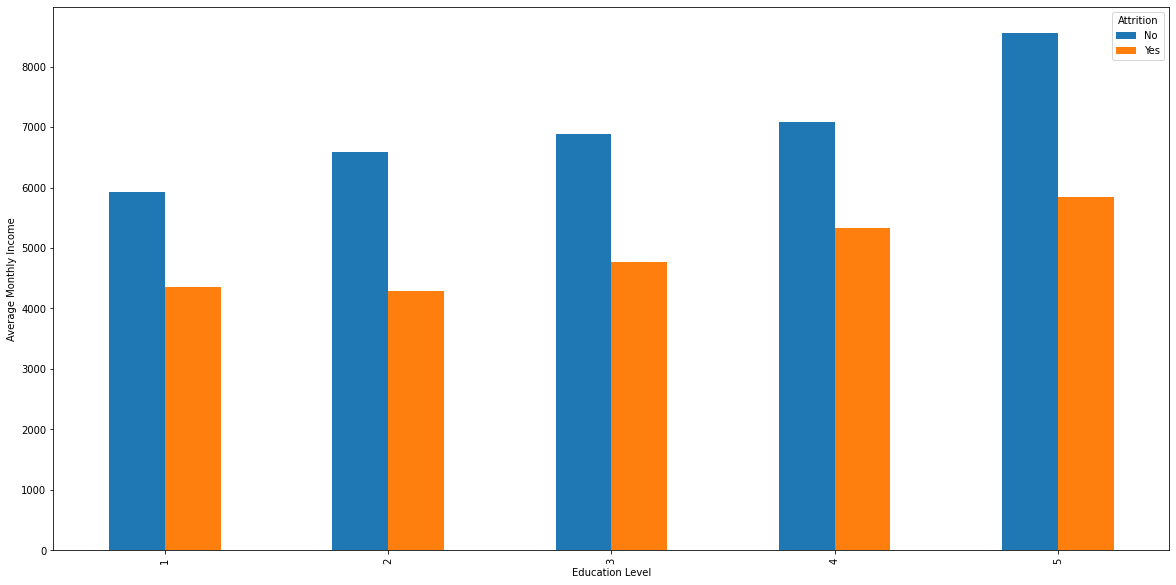

In [70]:
plt.rcParams['figure.figsize'] = 20, 10
ibm.groupby(['Education','Attrition']).MonthlyIncome.mean().unstack().plot(kind='bar')
plt.xlabel('Education Level')
plt.ylabel('Average Monthly Income')

Note: People with higher levels of education get on average a higher monthly income and are less likely to leave their jobs

# Feature Engineering

In [ ]:
'''data.drop(columns=['Attrition_encoded', 'Overtime_encoded'], inplace=True)'''

In [ ]:
'''binary_features = data.nunique()[data.nunique() == 2].keys().tolist()
numeric_features = [col for col in data.select_dtypes(['float','int']).columns.tolist() if col not in binary_features]
categorical_features = [col for col in data.select_dtypes('object').columns.to_list() if col not in binary_features + numeric_features]'''